In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def plot_cv_img(img_1, img_2):

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    ax[0].imshow(img_1)
    ax[0].set_title('image 1')
    ax[1].imshow(img_2)
    ax[1].set_title('changed image 2')
    plt.show()

In [3]:
img1 = plt.imread('.\lab2_images\image1.jpg')
img2 = plt.imread('.\lab2_images\image2.jpg')
img3 = plt.imread('.\lab2_images\image3.jpg')

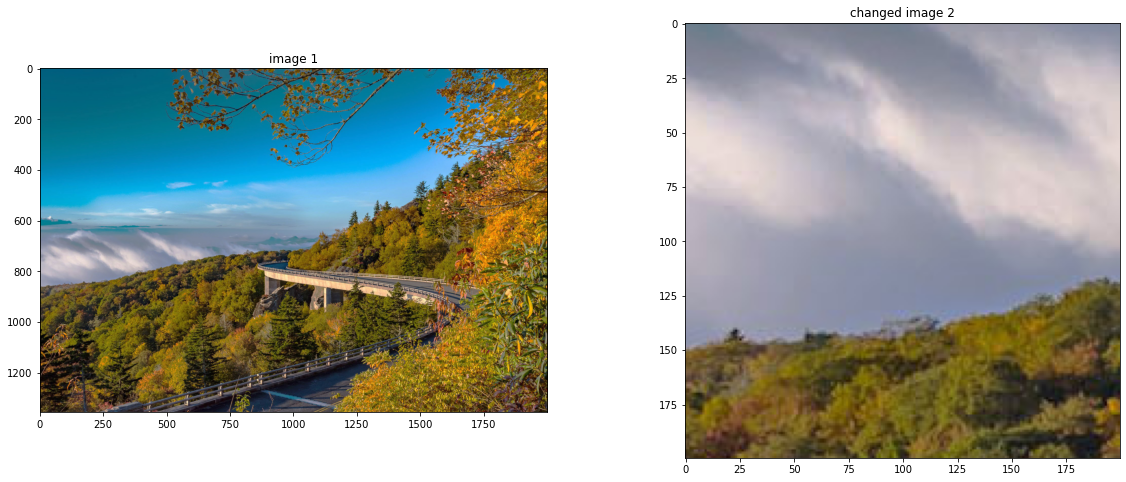

In [4]:
crop1 = img1[700:900, 150:350]
plot_cv_img(img1, crop1)

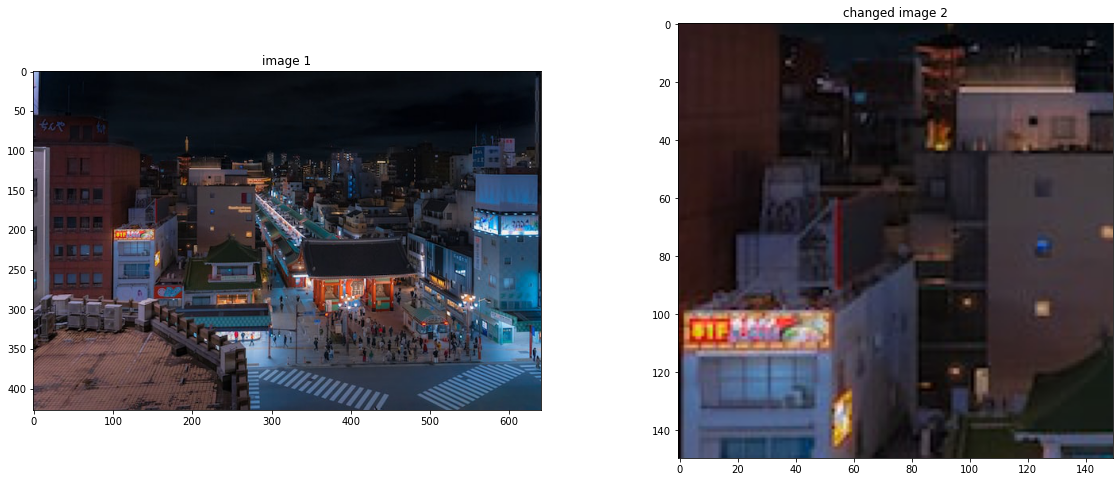

In [5]:
crop2 = img2[100:250, 100:250]
plot_cv_img(img2, crop2)

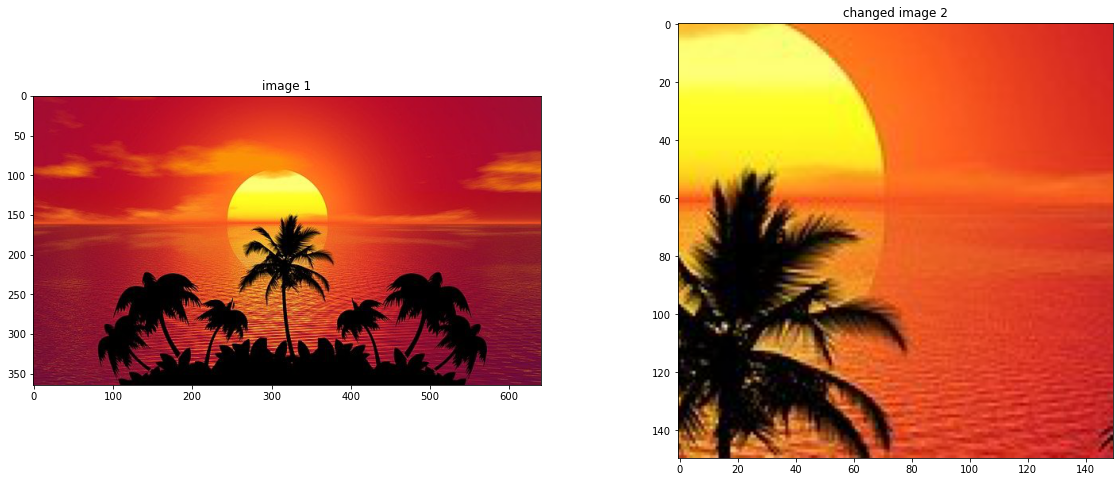

In [6]:
crop3 = img3[100:250, 300:450]
plot_cv_img(img3, crop3)

In [7]:
def get_ldb_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_ldb = np.zeros_like(gray_image)
    matrix_size = 3
    for h in range(0, image.shape[0] - matrix_size):
        for w in range(0, image.shape[1] - matrix_size):
            matrix = gray_image[h:h+matrix_size, w:w+matrix_size]
            central_pixel = matrix[1,1]
            binary_matrix = (matrix >= central_pixel) * 1
            binary_vector = binary_matrix.T.flatten()
            binary_vector = np.delete(binary_vector, 4)
            indexes_of_ones = np.where(binary_vector)[0]
            sum_of_nums = np.sum(2**indexes_of_ones) if len(indexes_of_ones) >= 1 else 0
            img_ldb[h+1, w+1] = sum_of_nums
    return img_ldb

In [8]:
def matching(img1, img2, original_img1):
    result = cv2.matchTemplate(img1, img2, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    h, w = img2.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(original_img1, top_left, bottom_right, (0, 0, 255), 2)
    return original_img1

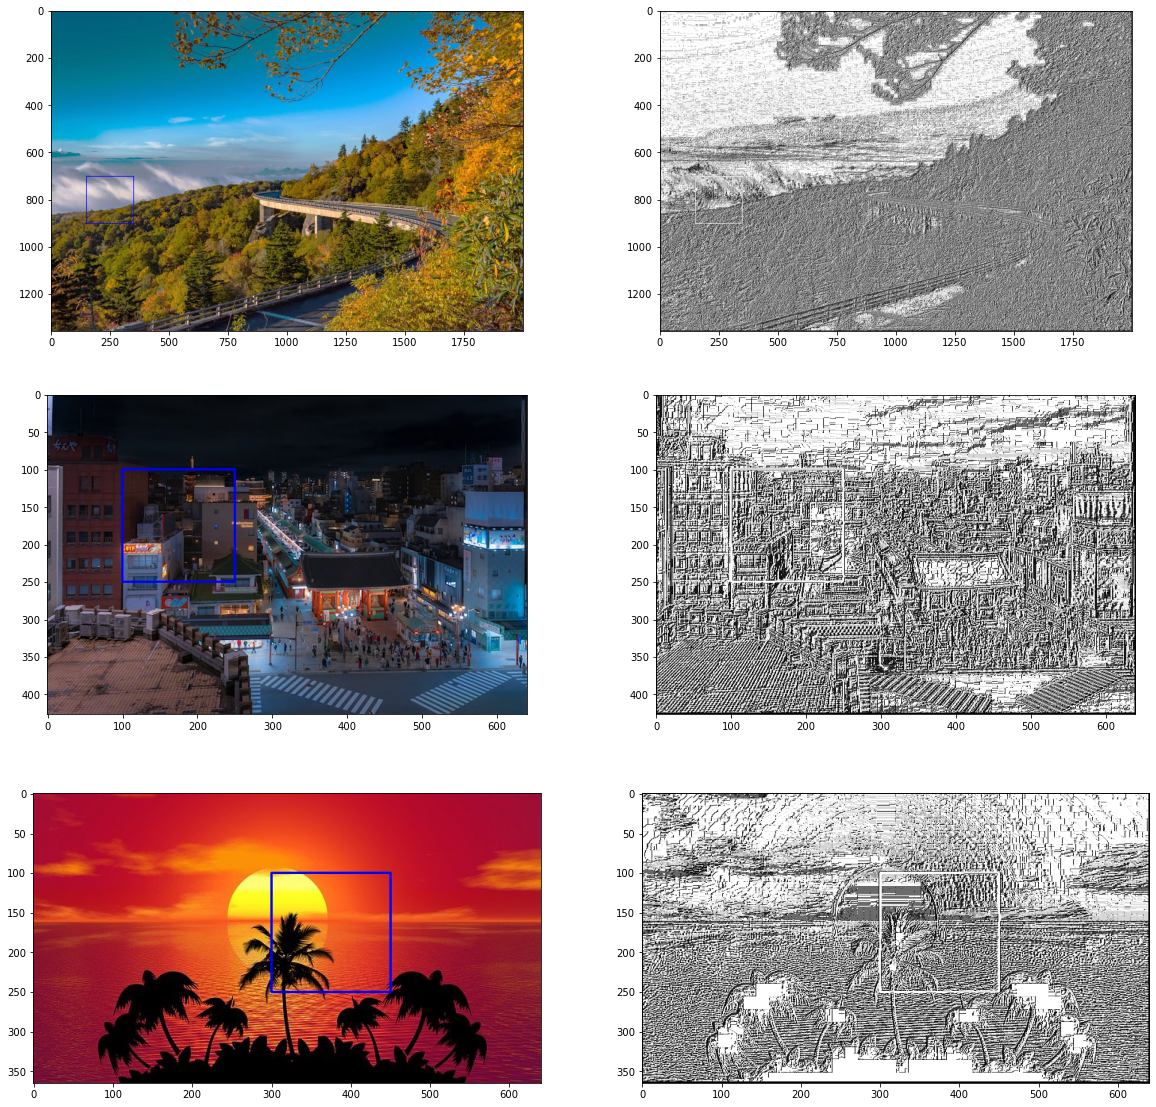

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

plt.figure(figsize=(8, 6))
axs[0, 0].imshow(matching(get_ldb_image(img1), get_ldb_image(crop1), img1))
axs[0, 1].imshow(get_ldb_image(img1),cmap='gray')

plt.figure(figsize=(8, 6))
axs[1, 0].imshow(matching(get_ldb_image(img2), get_ldb_image(crop2), img2),cmap='gray')
axs[1, 1].imshow(get_ldb_image(img2),cmap='gray')

plt.figure(figsize=(8, 6))
axs[2, 0].imshow(matching(get_ldb_image(img3), get_ldb_image(crop3), img3),cmap='gray')
axs[2, 1].imshow(get_ldb_image(img3),cmap='gray')

plt.show()